In [1]:
# import os
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))
# os.environ["CUDA_VISIBLE_DEVICES"] = "5"
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))

# #####################################
###### Not ncessary anymore, was to set the backend to cpu manually
# import few
# cfg_set = few.get_config_setter(reset=True)
# # cfg_set.enable_backends("cpu")
####################################
import few
for backend in ["cpu", "cuda11x", "cuda12x", "cuda", "gpu"]:
    print(f" - Backend '{backend}': {"available" if few.has_backend(backend) else "unavailable"}")

 - Backend 'cpu': available
 - Backend 'cuda11x': unavailable
 - Backend 'cuda12x': unavailable
 - Backend 'cuda': unavailable
 - Backend 'gpu': unavailable


In [2]:

from bhpwave.waveform import KerrWaveform
from bhpwave.harmonics.amplitudes import HarmonicAmplitudes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator
import os


from few.utils.geodesic import get_separatrix



# Have to install BhpWave first
amp_BHPWave = HarmonicAmplitudes()


#### for the local version
from few.amplitude.ampinterp2d import AmpInterpKerrEccEq
amp_Kerr_ecc = AmpInterpKerrEccEq()

##### For the pip version
# from few.amplitude.ampinterp2d import AmpInterpKerrEqEcc
# amp_Kerr_ecc = AmpInterpKerrEqEcc()

latex_setting = {'text.usetex': True,
        'font.family': 'serif',
        'font.serif': 'cmr10',
        'font.weight':'medium',
        'mathtext.fontset': 'cm',
        'text.latex.preamble': r"\usepackage{amsmath}",
        # 'font.size': 14,
        # 'figure.figsize': (7, 7),
        # 'figure.titlesize': 'large',
        'axes.formatter.use_mathtext': True,
        # 'axes.formatter.limits': [-2, 4],
        # 'axes.titlesize': 'large',
        # 'axes.labelsize': 'large',
        'xtick.top': True,
        # 'xtick.major.size': 5,
        # 'xtick.minor.size': 3,
        # 'xtick.major.width': 0.8,
        # 'xtick.minor.visible': True,
        'xtick.direction': 'in',
        # 'xtick.labelsize': 'medium',
        'ytick.right': True,
        # 'ytick.major.size': 5,
        # 'ytick.minor.size': 3,
        # 'ytick.major.width': 0.8,
        # 'ytick.minor.visible': True,
        'ytick.direction': 'in',
        # 'ytick.labelsize': 'medium',
        # 'legend.frameon': True,
        # 'legend.framealpha': 1,
        # 'legend.fontsize': 'medium',
        # 'legend.scatterpoints' : 3,
        #'lines.color': 'k',
        # 'lines.linewidth': 2,
        # 'patch.linewidth': 1,
        # 'hatch.linewidth': 1,
        # 'grid.linestyle': 'dashed',
        'grid.linewidth' : 0.3,
        # 'savefig.dpi' : 200,
        # 'savefig.format' : 'pdf',
        # 'savefig.bbox' : 'tight',
        'savefig.transparent' : True,
    }
plt.rcParams.update(latex_setting)


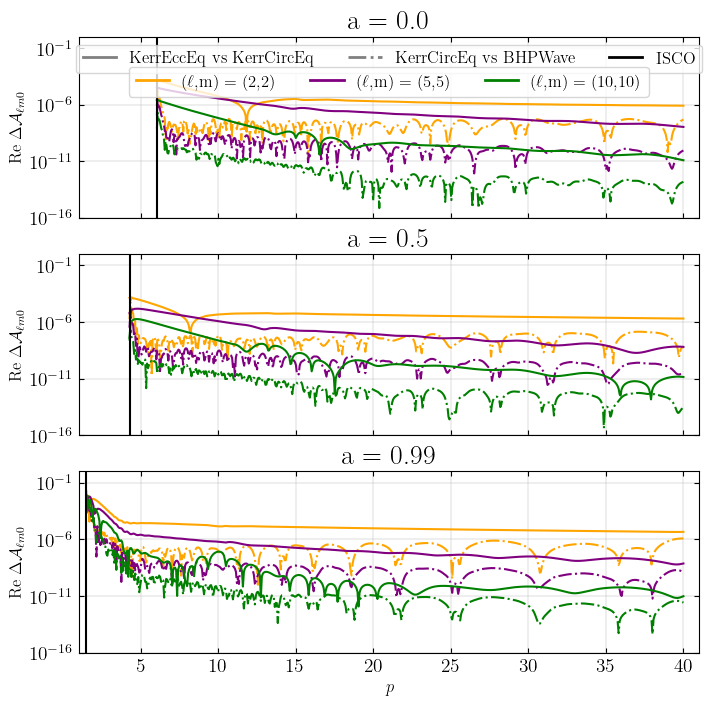

In [3]:
path = os.getcwd() + '/Data/'#"/home/hkhalvati/Downloads/KerrEccentricEquatorialFigures/scripts/Results/Cross_tests/"
title_fontsize = 20
label_fontsize = 12
tick_fontsize = 14
legend_fontsize = 12
text_fontsize = 12


ecc = 0.0
xI = 1.0
e = np.array([ecc])
xI = np.array([xI])

####### Loading the saved data from KerrCir version of FEW ---> https://github.com/Hassankh92/FastEMRIWaveforms_KerrCircNonvac
###### Download the data from :
#  https://perimeter-my.sharepoint.com/:f:/g/personal/hkhalvati_perimeterinstitute_ca/EpClG00fwZVNsch7WU2OrGQBdtY8cctLCEdKmemo2S7fZw?e=KbP3cX
KerrCirc_data =  np.loadtxt(path + "Amplitudes_KerrCirc_full.txt")
l_KerrCirc = KerrCirc_data[:,0]
m_KerrCirc = KerrCirc_data[:,1]
a_KerrCirc = KerrCirc_data[:,2]
p_KerrCirc = KerrCirc_data[:,3]
C_real_KerrCirc = KerrCirc_data[:,4]
C_imag_KerrCirc = KerrCirc_data[:,5]


a_arr = [0.0, 0.5, 0.99] #np.unique(a_KerrCirc)[::2]

lm_list = [(2,2),(5,5),(10,10)]

# c = ["k", "r", "b","orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]
c = ["orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]




fig, ax = plt.subplots(len(a_arr), 1, figsize=(8, 8))
# plt.figure(figsize = (12,6.5))

for i,a in enumerate(a_arr):
    mask_H = (a_KerrCirc == a)
    p = np.unique(p_KerrCirc[mask_H])
    ps = np.min(p)
    # ps = get_separatrix(a,e, x)
    # p = np.linspace(ps+0.0305, 40.0, 600)
    a_all, p_all, e_all, xI_all = np.asarray([temp.ravel() for temp in np.meshgrid(a, p, e, xI)])
    teuk_modes_Kerr = amp_Kerr_ecc(a, p_all, e_all,  xI_all)
    for jj, (l,m) in enumerate(lm_list):
        modes_Kerr = teuk_modes_Kerr[:, amp_Kerr_ecc.special_index_map[(l,m,0)]] #Kerr case
        # modes_Kerr = modes_Kerr.get()  ##### Uncomment this line if you are using GPU
        zach_modes_Kerr = amp_BHPWave(l,m,a_all,p_all)


        # mask Has's data from the saved file
        mask = (l_KerrCirc == l) & (m_KerrCirc == m) & (a_KerrCirc == a)
        modes_KerrCirc = (C_real_KerrCirc[mask] + 1j*C_imag_KerrCirc[mask])


        modes_KerrCirc = modes_KerrCirc.real
        modes_Kerr = modes_Kerr.real
        zach_modes_Kerr = zach_modes_Kerr.real


        frac_err_KerrEcc_KerrCirc = abs((modes_KerrCirc - modes_Kerr))# / modes_Kerr)
        frac_err_KerrCirc_BHPWave = abs((modes_KerrCirc - zach_modes_Kerr))# / modes_KerrCirc)
        frac_err_KerrEcc_BHPWave = abs((zach_modes_Kerr - modes_Kerr))# / modes_Kerr)
        n_skip = 1
        ax[i].plot(p_all[::n_skip],frac_err_KerrEcc_KerrCirc[::n_skip], '-', color = c[jj], label = f"$l,m:({l},{m})$, KerrEccEq vs KerrCircEq", rasterized = True)# and a = {a}")
        # ax[i].plot(p_all[::n_skip],frac_err_KerrEcc_BHPWave[::n_skip],marker='*', linestyle='None', markerfacecolor='none', color = c[j], label = f"$l,m:({l},{m})$, KerrEccEq vs BHPWave")# and a = {a}")
        ax[i].plot(p_all[::n_skip],frac_err_KerrCirc_BHPWave[::n_skip], '-.', color = c[jj], label = f"$l,m:({l},{m})$, KerrCircEq vs BHPWave", rasterized = True)# and a = {a}")

    ax[i].axvline(ps, color = 'k' ,label=f"ISCO")
    ax[i].set_yscale("log")   
    ax[i].set_ylabel(r"$ \mathrm{Re} \ \Delta\mathcal{A}_{\ell m 0}$", fontsize = label_fontsize)
    ax[i].set_title(f"a = {a}", fontsize = title_fontsize)
    ax[i].set_xlim(1,41)
    ax[i].set_ylim(1e-16,1e0)
    ax[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax[i].grid()
    # ax[i].legend(loc = "upper right",fontsize = legend_fontsize)


ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[-1].set_xlabel("$p$", fontsize = label_fontsize)


style_lines = [
    Line2D([0], [0], color="gray", linestyle="-", lw=2, label="KerrEccEq vs KerrCircEq"),
    Line2D([0], [0], color="gray", linestyle="-.", lw=2, label="KerrCircEq vs BHPWave"),
    Line2D([0], [0], color="k", linestyle="-", lw=2, label="ISCO"),
]

mode_lines = [ 
    Line2D([0], [0], color=c[0], lw=2, label=r"($\ell$,m) = (2,2)"),
    Line2D([0], [0], color=c[1], lw=2, label=r"($\ell$,m) = (5,5)"),
    Line2D([0], [0], color=c[2], lw=2, label=r"($\ell$,m) = (10,10)")
]

# ax[0].legend(handles=custom_lines, ncol = 3, loc="upper right", fontsize=legend_fontsize)

leg1 = ax[0].legend(handles=style_lines, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize=legend_fontsize)
leg2 = ax[0].legend(handles=mode_lines, loc='upper center', bbox_to_anchor=(0.5, 0.88), ncol=3, fontsize=legend_fontsize)
ax[0].add_artist(leg1)







# plt.savefig(path + f"amp_err.pdf", transparent=False)



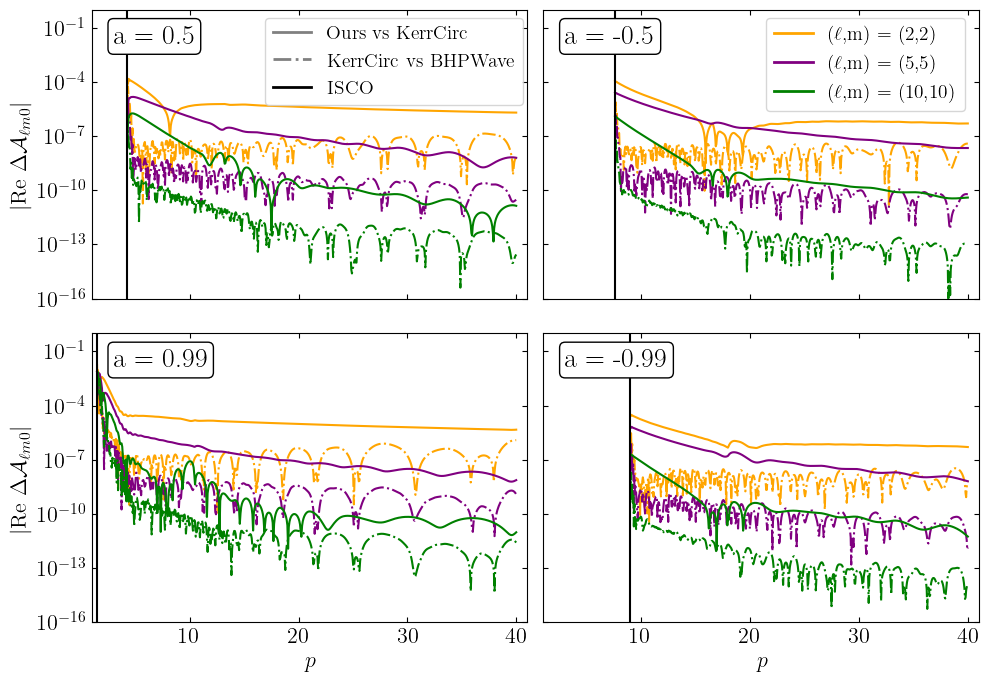

In [4]:
path = os.getcwd() + '/Data/'#"/home/hkhalvati/Downloads/KerrEccentricEquatorialFigures/scripts/Results/Cross_tests/"
title_fontsize = 20
label_fontsize = 16
tick_fontsize = 16
legend_fontsize = 14
text_fontsize = 14


ecc = 0.0
xI = 1.0
e = np.array([ecc])
xI = np.array([xI])

####### Loading the saved data from KerrCir version of FEW ---> https://github.com/Hassankh92/FastEMRIWaveforms_KerrCircNonvac
###### Download the data from :
#  https://perimeter-my.sharepoint.com/:f:/g/personal/hkhalvati_perimeterinstitute_ca/EpClG00fwZVNsch7WU2OrGQBdtY8cctLCEdKmemo2S7fZw?e=KbP3cX
KerrCirc_data =  np.loadtxt(path + "Amplitudes_KerrCirc_full.txt")
l_KerrCirc = KerrCirc_data[:,0]
m_KerrCirc = KerrCirc_data[:,1]
a_KerrCirc = KerrCirc_data[:,2]
p_KerrCirc = KerrCirc_data[:,3]
C_real_KerrCirc = KerrCirc_data[:,4]
C_imag_KerrCirc = KerrCirc_data[:,5]


# a_arr = [0.0, 0.5, 0.99] #np.unique(a_KerrCirc)[::2]
a_arr = [0.5, -0.5, 0.99, -0.99] #np.unique(a_KerrCirc)[::2]

lm_list = [(2,2),(5,5),(10,10)]

# c = ["k", "r", "b","orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]
c = ["orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]




fig, ax = plt.subplots(2, 2, figsize=(10, 7))
# plt.figure(figsize = (12,6.5))
ax = ax.flatten()

for i,a in enumerate(a_arr):
    mask_H = (a_KerrCirc == a)
    p = np.unique(p_KerrCirc[mask_H])
    ps = np.min(p)
    # ps = get_separatrix(a,e, x)
    # p = np.linspace(ps+0.0305, 40.0, 600)
    a_all, p_all, e_all, xI_all = np.asarray([temp.ravel() for temp in np.meshgrid(a, p, e, xI)])
    teuk_modes_Kerr = amp_Kerr_ecc(a, p_all, e_all,  xI_all)
    for jj, (l,m) in enumerate(lm_list):
        modes_Kerr = teuk_modes_Kerr[:, amp_Kerr_ecc.special_index_map[(l,m,0)]] #Kerr case
        # modes_Kerr = modes_Kerr.get()  ##### Uncomment this line if you are using GPU
        zach_modes_Kerr = amp_BHPWave(l,m,a_all,p_all)


        # mask Has's data from the saved file
        mask = (l_KerrCirc == l) & (m_KerrCirc == m) & (a_KerrCirc == a)
        modes_KerrCirc = (C_real_KerrCirc[mask] + 1j*C_imag_KerrCirc[mask])


        modes_KerrCirc = modes_KerrCirc.real
        modes_Kerr = modes_Kerr.real
        zach_modes_Kerr = zach_modes_Kerr.real


        frac_err_KerrEcc_KerrCirc = abs((modes_KerrCirc - modes_Kerr))# / modes_Kerr)
        frac_err_KerrCirc_BHPWave = abs((modes_KerrCirc - zach_modes_Kerr))# / modes_KerrCirc)
        frac_err_KerrEcc_BHPWave = abs((zach_modes_Kerr - modes_Kerr))# / modes_Kerr)
        n_skip = 1
        ax[i].plot(p_all[::n_skip],frac_err_KerrEcc_KerrCirc[::n_skip], '-', color = c[jj], label = f"$l,m:({l},{m})$, KerrEccEq vs KerrCircEq", rasterized = True)# and a = {a}")
        # ax[i].plot(p_all[::n_skip],frac_err_KerrEcc_BHPWave[::n_skip],marker='*', linestyle='None', markerfacecolor='none', color = c[j], label = f"$l,m:({l},{m})$, KerrEccEq vs BHPWave")# and a = {a}")
        ax[i].plot(p_all[::n_skip],frac_err_KerrCirc_BHPWave[::n_skip], '-.', color = c[jj], label = f"$l,m:({l},{m})$, KerrCircEq vs BHPWave", rasterized = True)# and a = {a}")

    ax[i].axvline(ps, color = 'k' ,label=f"ISCO")
    ax[i].set_yscale("log")
    if i==0 or i==2:   
        # ax[i].set_ylabel(r"$ \mathrm{Re} \ A_{\ell m 0}$ absolute error", fontsize = label_fontsize)
        ax[i].set_ylabel(r"$ |\mathrm{Re} \ \Delta\mathcal{A}_{\ell m 0}|$", fontsize = label_fontsize)

    # ax[i].set_title(f"a = {a}", fontsize = title_fontsize)
    # ax[i].text(0.98,0.95, f"a = {a}", fontsize = title_fontsize,ha='right', va='top', transform=ax[i].transAxes)
    ax[i].text(
    0.05, 0.95, f"a = {a}",
    fontsize=title_fontsize,
    ha='left', va='top',
    transform=ax[i].transAxes,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
)
    ax[i].set_xlim(1,41)
    ax[i].set_ylim(1e-16,1e0)
    ax[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    # ax[i].grid()
    # ax[i].legend(loc = "upper right",fontsize = legend_fontsize)





ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

ax[1].set_yticklabels([])
ax[3].set_yticklabels([])


ax[2].set_xlabel("$p$", fontsize = label_fontsize)
ax[3].set_xlabel("$p$", fontsize = label_fontsize)


style_lines = [
    Line2D([0], [0], color="gray", linestyle="-", lw=2, label="Ours vs KerrCirc"),
    Line2D([0], [0], color="gray", linestyle="-.", lw=2, label="KerrCirc vs BHPWave"),
    Line2D([0], [0], color="k", linestyle="-", lw=2, label="ISCO"),
]

mode_lines = [ 
    Line2D([0], [0], color=c[0], lw=2, label=r"($\ell$,m) = (2,2)"),
    Line2D([0], [0], color=c[1], lw=2, label=r"($\ell$,m) = (5,5)"),
    Line2D([0], [0], color=c[2], lw=2, label=r"($\ell$,m) = (10,10)")
]


# fig.legend(handles=style_lines, loc='upper left', bbox_to_anchor=(0.11, 0.968),
#            ncol=1, fontsize=legend_fontsize)

# fig.legend(handles=mode_lines, loc='upper right', bbox_to_anchor=(0.78, 0.968),
#            ncol=1, fontsize=legend_fontsize)
fig.legend(handles=style_lines, loc='upper left', bbox_to_anchor=(0.26, 0.97),
           ncol=1, fontsize=legend_fontsize)

fig.legend(handles=mode_lines, loc='upper right', bbox_to_anchor=(0.98, 0.97),
           ncol=1, fontsize=legend_fontsize)



plt.subplots_adjust( wspace=0.03, hspace=0.05)


plt.tight_layout()
plt.savefig(path + f"amp_err.pdf", transparent=False)

